In [2]:
import pandas as pd
import numpy as np

In [ ]:
# BindingDB dataset process

In [21]:
df = pd.read_csv('/Users/kexinhuang/Downloads/BindingDB_All.tsv', sep = '\t', error_bad_lines=False)

b'Skipping line 772572: expected 193 fields, saw 205\nSkipping line 772598: expected 193 fields, saw 205\n'
b'Skipping line 805291: expected 193 fields, saw 205\n'
b'Skipping line 827961: expected 193 fields, saw 265\n'
b'Skipping line 1231688: expected 193 fields, saw 241\n'
b'Skipping line 1345591: expected 193 fields, saw 241\nSkipping line 1345592: expected 193 fields, saw 241\nSkipping line 1345593: expected 193 fields, saw 241\nSkipping line 1345594: expected 193 fields, saw 241\nSkipping line 1345595: expected 193 fields, saw 241\nSkipping line 1345596: expected 193 fields, saw 241\nSkipping line 1345597: expected 193 fields, saw 241\nSkipping line 1345598: expected 193 fields, saw 241\nSkipping line 1345599: expected 193 fields, saw 241\n'
b'Skipping line 1358864: expected 193 fields, saw 205\n'
b'Skipping line 1378087: expected 193 fields, saw 241\nSkipping line 1378088: expected 193 fields, saw 241\nSkipping line 1378089: expected 193 fields, saw 241\nSkipping line 1378090: e

In [5]:
df.head(2)

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,InChI=1S/C22H24BrFN4O2/c1-28-7-5-14(6-8-28)12-...,UHTHHESEBZOYNR-UHFFFAOYSA-N,21,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",HIV-1 Protease,Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",HIV-1 Protease,Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns.values

array(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name Assigned by Curator or DataSource',
       'Target Source Organism According to Curator or DataSource',
       'Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)',
       'koff (s-1)', 'pH', 'Temp (C)', 'Curation/DataSource',
       'Article DOI', 'PMID', 'PubChem AID', 'Patent Number', 'Authors',
       'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'Ligand HET ID in PDB',
       'PDB ID(s) for Ligand-Target Complex', 'PubChem CID',
       'PubChem SID', 'ChEBI ID of Ligand', 'ChEMBL ID of Ligand',
       'DrugBank ID of Ligand', 'IUPHAR_GRAC ID of Ligand',
       'KEGG ID of Ligand', 'ZINC ID of Ligand',
       'Number of Protein Chains in Target (>1 implies a multichain complex)',
       'BindingDB Target Chain  Sequence', '

In [11]:
kd = df[df['Kd (nM)'].notnull()]['Kd (nM)'].values

In [24]:
len(df[df['Kd (nM)'].notnull()])

75449

In [23]:
len(df[df['IC50 (nM)'].notnull()])

1138703

In [12]:
IC50 = df[df['IC50 (nM)'].notnull()]['IC50 (nM)'].values

In [22]:
len(df)

1813527

In [25]:
df = df[df['Number of Protein Chains in Target (>1 implies a multichain complex)'] == 1.0]

In [26]:
len(df)

1733855

In [27]:
df = df[df['Ligand SMILES'].notnull()]

In [28]:
len(df)

1733850

In [45]:
df_IC50 = df[df['IC50 (nM)'].notnull()]
df_Kd = df[df['Kd (nM)'].notnull()]

In [30]:
len(df_IC50)

1080811

In [31]:
len(df_Kd)

74761

In [46]:
df_IC50 = df_IC50[['BindingDB Reactant_set_id', 'Ligand InChI', 'Ligand SMILES', 'PubChem CID', 'UniProt (SwissProt) Primary ID of Target Chain', 'BindingDB Target Chain  Sequence', 'IC50 (nM)']]
df_Kd = df_Kd[['BindingDB Reactant_set_id', 'Ligand InChI', 'Ligand SMILES', 'PubChem CID', 'UniProt (SwissProt) Primary ID of Target Chain', 'BindingDB Target Chain  Sequence', 'Kd (nM)']]

In [47]:
df_IC50.rename(columns={'BindingDB Reactant_set_id':'ID',
                          'Ligand SMILES':'SMILES',
                          'Ligand InChI':'InChI',
                          'PubChem CID':'PubChem_ID',
                          'UniProt (SwissProt) Primary ID of Target Chain':'UniProt_ID',
                          'BindingDB Target Chain  Sequence': 'Target Sequence',
                          'IC50 (nM)': 'IC50'}, 
                 inplace=True)

df_Kd.rename(columns={'BindingDB Reactant_set_id':'ID',
                          'Ligand SMILES':'SMILES',
                          'Ligand InChI':'InChI',
                          'PubChem CID':'PubChem_ID',
                          'UniProt (SwissProt) Primary ID of Target Chain':'UniProt_ID',
                          'BindingDB Target Chain  Sequence': 'Target Sequence',
                          'Kd (nM)': 'Kd'}, 
                 inplace=True)

In [48]:
df_IC50['IC50'] = df_IC50['IC50'].str.replace('>', '')
df_IC50['IC50'] = df_IC50['IC50'].str.replace('<', '')

df_Kd['Kd'] = df_Kd['Kd'].str.replace('>', '')
df_Kd['Kd'] = df_Kd['Kd'].str.replace('<', '')

In [49]:
df_IC50['IC50'] = df_IC50['IC50'].astype(float)
df_Kd['Kd'] = df_Kd['Kd'].astype(float)

In [50]:
# have at least uniprot or pubchem ID
df_IC50 = df_IC50[df_IC50.PubChem_ID.notnull() | df_IC50.UniProt_ID.notnull()]

In [51]:
len(df_IC50)

1079221

In [52]:
# have at least InChI key
df_IC50 = df_IC50[df_IC50.InChI.notnull()]

In [53]:
len(df_IC50)

1078760

In [54]:
df_Kd = df_Kd[df_Kd.PubChem_ID.notnull() | df_Kd.UniProt_ID.notnull()]
df_Kd = df_Kd[df_Kd.InChI.notnull()]

In [55]:
df_IC50 = df_IC50[df_IC50.IC50 <= 10000000.0]
df_Kd = df_Kd[df_Kd.Kd <= 10000000.0]

In [56]:
len(df_Kd)

66444

In [57]:
len(df_IC50)

1073803

In [65]:
# random_fold
def create_fold(df, fold_seed, frac, path):
    train_frac, val_frac, test_frac = frac
    test = df.sample(frac = test_frac, replace = False, random_state = fold_seed)
    train_val = df[~df.index.isin(test.index)]
    val = train_val.sample(frac = val_frac/(1-test_frac), replace = False, random_state = 1)
    train = train_val[~train_val.index.isin(val.index)]
    
    train.reset_index(drop = True).to_csv(path + '/train.csv')
    val.reset_index(drop = True).to_csv(path + '/val.csv')
    test.reset_index(drop = True).to_csv(path + '/test.csv')
    #train_val.reset_index(drop = True).to_csv(path + '/train_val.csv')
    
    return train, val, test

In [67]:
for i in range(1,2):
    path = '../DTBA_data_folder/IC50/random/fold'+str(i)
    _,_,_ = create_fold(df_IC50, i, [0.7, 0.1, 0.2], path)

In [68]:
for i in range(1,2):
    path = '../DTBA_data_folder/Kd/random/fold'+str(i)
    _,_,_ = create_fold(df_Kd, i, [0.7, 0.1, 0.2], path)

In [69]:
df_Kd.columns.values

array(['ID', 'InChI', 'SMILES', 'PubChem_ID', 'UniProt_ID',
       'Target Sequence', 'Kd'], dtype=object)

In [70]:
# unseen protein
def create_fold_setting_unseen_protein(df, fold_seed, frac, path):
    train_frac, val_frac, test_frac = frac
    gene_drop = df['Target Sequence'].drop_duplicates().sample(frac = test_frac, replace = False, random_state = fold_seed).values
    
    test = df[df['Target Sequence'].isin(gene_drop)]

    train_val = df[~df['Target Sequence'].isin(gene_drop)]
    
    gene_drop_val = train_val['Target Sequence'].drop_duplicates().sample(frac = val_frac/(1-test_frac), replace = False, random_state = fold_seed).values
    val = train_val[train_val['Target Sequence'].isin(gene_drop_val)]
    train = train_val[~train_val['Target Sequence'].isin(gene_drop_val)]

    train.reset_index(drop = True).to_csv(path + '/train.csv')
    val.reset_index(drop = True).to_csv(path + '/val.csv')
    test.reset_index(drop = True).to_csv(path + '/test.csv')
    #train_val.reset_index(drop = True).to_csv(path + '/train_val.csv')
    
    return train, val, test

In [71]:
for i in range(1,2):
    path = '../DTBA_data_folder/IC50/unseen_protein/fold'+str(i)
    _,_,_ = create_fold_setting_unseen_protein(df_IC50, i, [0.7, 0.1, 0.2], path)

In [72]:
for i in range(1,2):
    path = '../DTBA_data_folder/Kd/unseen_protein/fold'+str(i)
    _,_,_ = create_fold_setting_unseen_protein(df_Kd, i, [0.7, 0.1, 0.2], path)

In [73]:
# unseen drug
def create_fold_setting_unseen_drug(df, fold_seed, frac, path):
    train_frac, val_frac, test_frac = frac
    drug_drop = df['SMILES'].drop_duplicates().sample(frac = test_frac, replace = False, random_state = fold_seed).values
    
    test = df[df['SMILES'].isin(drug_drop)]

    train_val = df[~df['SMILES'].isin(drug_drop)]
    
    drug_drop_val = train_val['SMILES'].drop_duplicates().sample(frac = val_frac/(1-test_frac), replace = False, random_state = fold_seed).values
    val = train_val[train_val['SMILES'].isin(drug_drop_val)]
    train = train_val[~train_val['SMILES'].isin(drug_drop_val)]

    train.reset_index(drop = True).to_csv(path + '/train.csv')
    val.reset_index(drop = True).to_csv(path + '/val.csv')
    test.reset_index(drop = True).to_csv(path + '/test.csv')
    #train_val.reset_index(drop = True).to_csv(path + '/train_val.csv')
    
    return train, val, test

In [74]:
for i in range(1,2):
    path = '../DTBA_data_folder/IC50/unseen_drug/fold'+str(i)
    _,_,_ = create_fold_setting_unseen_drug(df_IC50, i, [0.7, 0.1, 0.2], path)

In [75]:
for i in range(1,2):
    path = '../DTBA_data_folder/Kd/unseen_drug/fold'+str(i)
    _,_,_ = create_fold_setting_unseen_drug(df_Kd, i, [0.7, 0.1, 0.2], path)

In [118]:
df_Kd.reset_index(drop = True).to_csv('../DTBA_data_folder/Kd/data.csv')

In [121]:
X_d = df_Kd.SMILES.values
X_t = df_Kd['Target Sequence'].values
y = df_Kd.Kd.values

In [122]:
df_data = pd.DataFrame(zip(X_d, X_t, y))
df_data.rename(columns={0:'SMILES',
                          1: 'Target Sequence',
                          2: 'Label'}, 
                 inplace=True)

In [94]:
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs

In [ ]:
def smilesToECFP4(s):
    mol = Chem.MolFromSmiles(s)
    mapping = {}
    t = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 1024, bitInfo = mapping)
    bit_vector = np.zeros(1024)
    bit_vector[list(mapping.keys())] = 1
    return bit_vector

In [125]:
def smiles2ecfp(s, radius = 2, nBits = 2048):
    try:
        mol = Chem.MolFromSmiles(s)
        features_vec = AllChem.GetHashedMorganFingerprint(mol, radius, nBits=nBits)
        features = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(features_vec, features)
    except:
        print('rdkit not found this smiles for ecfp: ' + s + ' convert to all 1 features')
        features = np.ones((nBits, 1))
    return features

In [126]:
smiles2ecfp('Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1')

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
SMILES_encode = df_data.SMILES.apply(smiles2ecfp)

rdkit not found this smiles for ecfp: Cc1ccc(F)c(NC(=O)Nc2cnn(c2)-c2cccc3nnc(N)c23)c1 convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Oc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Oc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Oc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles for ecfp: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](C)N4)C(F

In [106]:
SMILES_encode.shape

(66444,)

In [107]:
len(df_Kd)

66444

In [99]:
(smiles2ecfp('CCCCCCCOC1OC(CO)C(O)C(O)C1O'))

array([0., 0., 0., ..., 0., 0., 0.])

In [108]:
df_Kd['Drug_Encoding'] = SMILES_encode

In [109]:
df_Kd['Drug_Encoding'].values.shape

(66444,)

In [114]:
def rdkit2d(s):    
    try:
        generator = rdNormalizedDescriptors.RDKit2DNormalized()
        features = generator.process(s)[1:]
    except:
        print('descriptastorus not found this smiles for ecfp: ' + s + ' convert to all 1 features')
        features = np.ones((200, 1))
    return np.array(features)

In [115]:
from descriptastorus.descriptors import rdDescriptors, rdNormalizedDescriptors

len(rdkit2d('CCCCCCCOC1OC(CO)C(O)C(O)C1O'))

200

In [58]:
# DTC dataset process
df_DTC = pd.read_csv('/Users/kexinhuang/Downloads/DtcDrugTargetInteractions.csv')

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,8,14,21,22,23,24,25,26,27,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
df_DTC.head(2)

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,compound_concentration_value_unit,substrate_type,substrate_relation,substrate_value,substrate_units,assay_description,title,journal,doc_type,annotation_comments
0,CHEMBL3545284,NaN,CERDULATINIB,NaN,Q9Y4K4,MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE...,MAP4K5,NaN,NaN,29191878.0,...,NM-UM,NaN,NaN,NaN,NaN,LC-MS/MS BASED KINOBEADS COMPETITIVE PULL-DOWN...,THE TARGET LANDSCAPE OF CLINICAL KINASE DRUGS,SCIENCE,NaN,NaN
1,CHEMBL3545284,NaN,CERDULATINIB,NaN,Q9Y478,"AMP-ACTIVATED PROTEIN KINASE, BETA-1 SUBUNIT",PRKAB1,NaN,NaN,29191878.0,...,NM-UM,NaN,NaN,NaN,NaN,LC-MS/MS BASED KINOBEADS COMPETITIVE PULL-DOWN...,THE TARGET LANDSCAPE OF CLINICAL KINASE DRUGS,SCIENCE,NaN,NaN


In [60]:
df_DTC.columns.values

array(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names',
       'wildtype_or_mutant', 'mutation_info', 'pubmed_id',
       'standard_type', 'standard_relation', 'standard_value',
       'standard_units', 'activity_comment', 'ep_action_mode',
       'assay_format', 'assaytype', 'assay_subtype', 'inhibitor_type',
       'detection_tech', 'assay_cell_line',
       'compound_concentration_value',
       'compound_concentration_value_unit', 'substrate_type',
       'substrate_relation', 'substrate_value', 'substrate_units',
       'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments'], dtype=object)

In [46]:
df_ba = pd.read_csv('/Users/kexinhuang/Desktop/data_balanced.csv')

In [27]:
length = []
for i in df_ba['Target Sequence'].unique():
    length.append(len(i))

In [12]:
from subword_nmt.apply_bpe import BPE
import codecs

#vocab_path = dataFolder + '/codes_protein.txt'
vocab_path = './ESPF/protein_codes_uniprot_2000.txt'
bpe_codes_protein = codecs.open(vocab_path)
pbpe = BPE(bpe_codes_protein, merges=-1, separator='')
#sub_csv = pd.read_csv(dataFolder + '/subword_units_map_protein.csv')
sub_csv = pd.read_csv('./ESPF/subword_units_map_uniprot_2000.csv')

idx2word_p = sub_csv['index'].values
words2idx_p = dict(zip(idx2word_p, range(0, len(idx2word_p))))

In [15]:
len(df_ba['Target Sequence'].unique())

1132

In [19]:
len(pbpe.process_line(df_ba['Target Sequence'].unique()[0]).split())

586

In [31]:
vocab_path = './ESPF/drug_codes_chembl_freq_1500.txt'
bpe_codes_drug = codecs.open(vocab_path)
dbpe = BPE(bpe_codes_drug, merges=-1, separator='')
#sub_csv = pd.read_csv(dataFolder + '/subword_units_map_drug.csv')
sub_csv = pd.read_csv('./ESPF/subword_units_map_chembl_freq_1500.csv')

idx2word_d = sub_csv['index'].values
words2idx_d = dict(zip(idx2word_d, range(0, len(idx2word_d))))

length_ = []
for x in df_ba.SMILES.unique():
    length_.append(len(dbpe.process_line(x).split()))
    

(array([1.5043e+04, 2.4611e+04, 1.3940e+03, 1.1500e+02, 4.3000e+01,
        2.9000e+01, 3.0000e+01, 1.7000e+01, 1.5000e+01, 7.0000e+00]),
 array([ 2. , 11.4, 20.8, 30.2, 39.6, 49. , 58.4, 67.8, 77.2, 86.6, 96. ]),
 <a list of 10 Patch objects>)

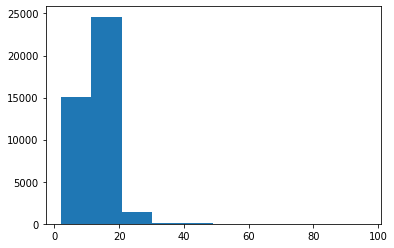

In [32]:
plt.hist(length_)

(array([692., 321.,  81.,  17.,  14.,   2.,   1.,   1.,   2.,   1.]),
 array([  18. ,  569.9, 1121.8, 1673.7, 2225.6, 2777.5, 3329.4, 3881.3,
        4433.2, 4985.1, 5537. ]),
 <a list of 10 Patch objects>)

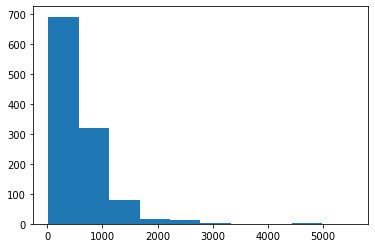

In [29]:
import matplotlib.pyplot as plt
plt.hist(length)

In [21]:
length_ = []
for x in df_ba['Target Sequence'].unique():
    length_.append(len(pbpe.process_line(x).split()))

(array([682., 324.,  85.,  16.,  18.,   2.,   1.,   1.,   2.,   1.]),
 array([   8.,  240.,  472.,  704.,  936., 1168., 1400., 1632., 1864.,
        2096., 2328.]),
 <a list of 10 Patch objects>)

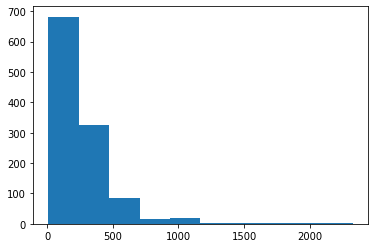

In [30]:
plt.hist(length_)

In [33]:
def protein2emb_encoder(x):
    max_p = 545
    t1 = pbpe.process_line(x).split()  # split
    try:
        i1 = np.asarray([words2idx_p[i] for i in t1])  # index
    except:
        i1 = np.array([0])

    l = len(i1)
   
    if l < max_p:
        i = np.pad(i1, (0, max_p - l), 'constant', constant_values = 0)
        input_mask = ([1] * l) + ([0] * (max_p - l))
    else:
        i = i1[:max_p]
        input_mask = [1] * max_p
        
    return i, np.asarray(input_mask)

def drug2emb_encoder(x):
    max_d = 50
    t1 = dbpe.process_line(x).split()  # split
    try:
        i1 = np.asarray([words2idx_d[i] for i in t1])  # index
    except:
        i1 = np.array([0])
    
    l = len(i1)

    if l < max_d:
        i = np.pad(i1, (0, max_d - l), 'constant', constant_values = 0)
        input_mask = ([1] * l) + ([0] * (max_d - l))

    else:
        i = i1[:max_d]
        input_mask = [1] * max_d

    return i, np.asarray(input_mask)

In [38]:
df_ba.sample(n=10).SMILES.apply(drug2emb_encoder).iloc[0][0]

array([ 790,  426,   43,  135,  158,   38, 1924,   95,  997,   29,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [39]:
df_data = df_ba.sample(n=10)
unique = pd.Series(df_data['SMILES'].unique()).apply(drug2emb_encoder)
unique_dict = dict(zip(df_data['SMILES'].unique(), unique))
df_data['drug_encoding'] = [unique_dict[i] for i in df_data['SMILES']]

In [42]:
x = df_data['drug_encoding'].iloc[0]

In [44]:
x[0]

array([1043,  340,   32,  116,   35,  852,   93,   66,  413,  332,   97,
         82,  464, 1284,  258, 1919, 1085,   85,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [80]:
def create_fold(df, x):
    test = df.sample(frac = 0.2, replace = False, random_state = x)
    train_val = df[~df.index.isin(test.index)]
    val = train_val.sample(frac = 0.125, replace = False, random_state = 1)
    train = train_val[~train_val.index.isin(val.index)]
    
    path = '../BIN/BindingDB/fold'+str(x)
    train.reset_index(drop = True).to_csv(path + '/train.csv')
    val.reset_index(drop = True).to_csv(path + '/val.csv')
    test.reset_index(drop = True).to_csv(path + '/test.csv')
    train_val.reset_index(drop = True).to_csv(path + '/train_val.csv')
    
    return train, val, test

In [83]:
_,_,_ = create_fold(df_ba, 3)

In [86]:
df_ba[df_ba['Target Sequence'].isnull()]

,Unnamed: 0,index,ID,SMILES,PubChem_ID,UniProt_ID,Target Sequence,IC50,label,Label


In [92]:
np.random.choice(list(range(1000)), 1)[0]

390

In [8]:
from pybiomed_helper import _GetPseudoAAC, CalculateAADipeptideComposition, calcPubChemFingerAll, CalculateConjointTriad, GetQuasiSequenceOrder


In [9]:
len(_GetPseudoAAC(df_ba['Target Sequence'].iloc[0]))

30

In [143]:
df = df_ba.sample(n = 100)

In [150]:
np.array(list(_GetPseudoAAC(df['Target Sequence'].iloc[0]).values())).shape

(30,)

In [145]:
import time
s = time.time()
df['Target Sequence'].apply(_GetPseudoAAC)
print(time.time() - s)

462.9734787940979


In [154]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, ChemicalFeatures, MACCSkeys
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Fingerprints import FingerprintMols

In [155]:
s = df.SMILES.values[0]


NumFinger = 2048
mol = Chem.MolFromSmiles(s)
bv = FingerprintMols.FingerprintMol(mol)
temp = tuple(bv.GetOnBits())
features = np.zeros((NumFinger, 1))
features[np.array(temp)] = 1
return features

In [163]:
features = np.zeros((NumFinger, 1))
features[np.array(temp)] = 1

In [164]:
features

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [54]:
char_drug = []
for i in df_ba.SMILES.values:
    char_drug += list(i)

In [58]:
len(np.unique(char_drug))

50

In [63]:
np.unique(char_drug)

array([' ', '#', '%', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', ':', '=', '@', 'A', 'B', 'C',
       'F', 'H', 'I', 'N', 'O', 'P', 'R', 'S', 'V', '[', '\\', ']', 'a',
       'b', 'c', 'e', 'i', 'l', 'n', 'o', 'r', 's', 'u', '|'], dtype='<U1')

In [101]:
char_target = []
for i in df_ba['Target Sequence'].values:
    char_target.append(len(list(i)))

(array([2.4198e+04, 1.5430e+04, 7.0380e+03, 4.1500e+02, 8.9000e+02,
        1.6000e+01, 1.1000e+01, 7.7000e+01, 1.2000e+01, 1.0000e+00]),
 array([  18. ,  569.9, 1121.8, 1673.7, 2225.6, 2777.5, 3329.4, 3881.3,
        4433.2, 4985.1, 5537. ]),
 <a list of 10 Patch objects>)

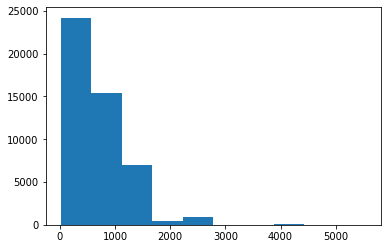

In [103]:
plt.hist(char_target)

In [61]:
len(np.unique(char_target))

40

In [64]:
un = np.unique(char_target)

In [77]:
un = (np.unique([i.upper() for i in un]))

In [59]:
zinc_charset = [
    ' ', '#', ')', '(', '+', '-', '/', '1', '3', '2', '5', '4', '7', '6', '8',
    '=', '@', 'C', 'B', 'F', 'I', 'H', 'O', 'N', 'S', '[', ']', '\\', 'c', 'l',
    'o', 'n', 'p', 's', 'r'
]
len(zinc_charset)

35

In [79]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(np.array(un).reshape(-1, 1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [97]:
un

array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], dtype='<U1')

In [93]:
def trans(x):
    return enc.transform(np.array(list(x.upper())).reshape(-1,1)).toarray()
df_ba['Target Encoding'] = df_ba['Target Sequence'].apply(trans)

In [94]:
df_ba.memory_usage()

Index                 128
Unnamed: 0         384704
index              384704
ID                 384704
SMILES             384704
PubChem_ID         384704
UniProt_ID         384704
Target Sequence    384704
IC50               384704
label              384704
Label              384704
Target Encoding    384704
dtype: int64

In [96]:
from sys import getsizeof
getsizeof(df_ba['Target Encoding'].iloc[5])

97872

In [92]:
len(df_ba)

48088

In [99]:
a = [1, 2, 3, 4, 5]
np.pad(a, (0, 3), 'constant', constant_values=(4, 6))

array([1, 2, 3, 4, 5, 6, 6, 6])

In [109]:
x = df_ba['Target Sequence'].iloc[5]
MAX_SEQ_PROTEIN = 1000

In [113]:
temp = list(x.upper()) + ['?']*1000
if len(temp) < MAX_SEQ_PROTEIN:
    temp = temp + ['?'] * (MAX_SEQ_PROTEIN-len(temp))
else:
    temp = temp[:MAX_SEQ_PROTEIN]

In [114]:
len(temp)

1000